In [25]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import ahocorasick

from choropleth_functions import *

In [36]:
def word_search(words, text, df):
    auto = ahocorasick.Automaton()

    # Add state terms to Aho-Korasick mapping object
    for substr in words:
        auto.add_word(substr, substr)
    auto.make_automaton()

    text = list(np.char.upper(text))

    matches = [''] * len(text)

    for i, astr in enumerate(text):
        matches[i] = ''
        # If match found, access label via dictionary
        for _, found in auto.iter(astr):
            matches[i] = found 

    #df['match'] = matches
    df = df.loc[np.array(matches) != '']
    #df = df.drop(['urls', 'profile_location', 'geotag_location', 'geotag_country'], axis=1)
    return df

#def word_search(word, text, df):
    #ind = np.char.find(np.char.upper(text), word)
    #ind[ind >= 0] = 1
    #ind[ind == -1] = 0

    #return df.loc[ind.astype('bool')]

def subset_date(df, date):
    inds = [x[0:7] == date for x in df.created_at.values]   

    return df[inds]

def sample(kw, state, date, n_samples = 10):
    df = fetch_data_kw(kw)
    df = subset_date(df, date)

    print(df[df.state == state].sample(n_samples).values)

def print_freq(kw, kw2, state, date):
    df = fetch_data_kw(kw)
    df = subset_date(df, date)
    df = df[df.state == state]
    print('Full Count: ', df.shape[0])

    tweet_text = df['text'].values
    tweet_text = tweet_text.astype('<U140')

    # "REP"
    df2 = word_search(kw2, tweet_text, df)
    print('Second Keyword Count: ', df2.shape[0])

    print('Percent: ', np.round((df2.shape[0] / df.shape[0])*100))

def plotty(kw, kw2, state, date, renderer = 'png'): 

    df = fetch_data_kw(kw)
    df = subset_date(df, date)
    df = df[df.state == state]
    og_count = df.shape[0]
    tweet_text = df['text'].values
    tweet_text = tweet_text.astype('<U140')
    df = word_search(kw2, tweet_text, df)
    count = df.shape[0]


    state_count = build_dataframe(kw, [date])
    state_count.index = state_count.State.values

    state_cts = pd.read_csv('/media/johnattan/LaCie/Twitter_Terms/State_Counts/' + date + '.csv')
    total_count = np.sum(state_cts[state_cts.State == state].Counts.values) 

    newval = (og_count - count) / total_count

    state_count.at[state, 'Count'] = newval
    #state_count['Count'] = [x.Count - count if x.State == state in list(state_count.Count.values)]

    fig = go.Figure(data=go.Choropleth(
        locations=state_count.State, # Spatial coordinates
        z = state_count.Count, # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        #colorbar_title = "Tweet Counts / Tweet Volume",
        zmin = 0,
        zmax = max(state_count['Count']),
        colorbar_title = "tweets"
    ))

    if kw == '':
        fig.update_layout(
            title_text = 'Tweets related to Covid-19',
            geo_scope='usa', # limite map scope to USA
        )
    else:
        fig.update_layout(
            title_text = 'Tweets related to Covid-19 and ' + kw + ' ' + date,
            geo_scope='usa', # limite map scope to USA
        )
    fig.show(renderer = renderer)


In [29]:
sample('DRINKING', 'IA', '2020-09')

[['yes, the drinking age, a thing that college aged Iowans love to respect'
  '2020-09-02 17:01:11+00:00' 'IA']
 ['hi everyone, my governor (who has two DUIs) is currently threatening to raise the drinking age to combat covid??? because she is a dumb donkey???? heehaw kim!!!!'
  '2020-09-03 19:51:35+00:00' 'IA']
 ['hi everyone, my governor (who has two DUIs) is currently threatening to raise the drinking age to combat covid??? because she is a dumb donkey???? heehaw kim!!!!'
  '2020-09-04 03:45:40+00:00' 'IA']
 ['Raising the drinking age ain’t gonna do shit. Kids are going to party and drink no matter what. You’re just getting them out of the bar scene, I’m sure it’ll be easy to find a basement or corn field 🙄'
  '2020-09-04 02:50:40+00:00' 'IA']
 ["Kimmie's only strategy when it comes to a pandemic revolves around drinking because, frankly, that's the only thing she ever thinks about"
  '2020-09-02 17:18:08+00:00' 'IA']
 ['hi everyone, my governor (who has two DUIs) is currently threa

In [37]:
print_freq('DRINKING', ['UNDERAGE', 'DRINKING AGE'], 'IA', '2020-09')

Full Count:  357
Second Keyword Count:  253
Percent:  71.0


   State     Date     Count
AK    AK  2020-11  0.002672
AL    AL  2020-11  0.000537
AR    AR  2020-11  0.000497
AZ    AZ  2020-11  0.000581
CA    CA  2020-11  0.000543
0.0012125294712024251


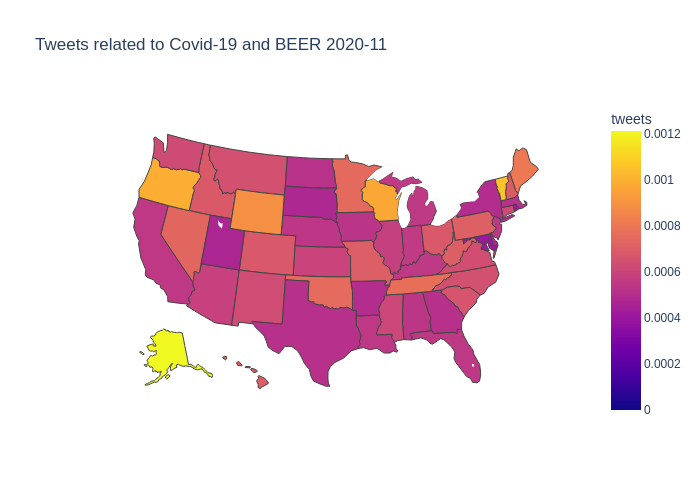

In [23]:
plotty('BEER', 'YOUNG', 'AK', '2020-11')

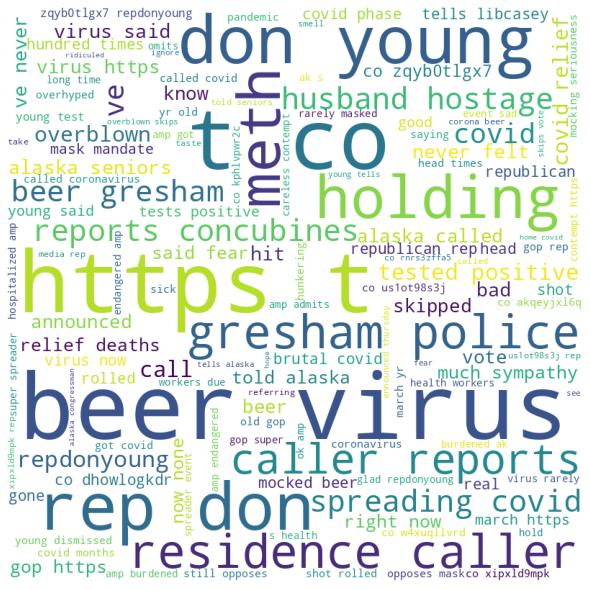

In [5]:
 
# Reads 'Youtube04-Eminem.csv' file
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.text:#df.CONTENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()